<h4 style="padding: 0.25em 0.5em;color: #494949;background: transparent;border-left: solid 5px #7db4e6;">課題2.1</h4>

[店舗Aと店舗Bの８月の客数データ](https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/shopAandB.txt)をダウンロードし、下記の例のように散布図を描いてください。

__ヒント__：今度のデータは全部で４列。４列目は店舗AかBかを表す列なので、これを利用して場合分けをする必要があります。Aの０列目、１列目、２列目をそれぞれ col1a, col2a, col3a、Bの０列目、１列目、２列目をそれぞれ col2a, col2b, col2c という名のリストに格納してください。

In [1]:
import urllib.request as req
req.urlretrieve('https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/shopAandB.txt', 'icecreamab.txt')

('icecreamab.txt', <http.client.HTTPMessage at 0x1d1fc85a588>)

In [2]:
col1a, col2a, col3a = [],[],[]
col1b, col2b, col3b = [],[],[]
for i, line in enumerate(open('icecreamab.txt', encoding='utf-8')):
    if i == 0:
        continue
    tmp = line.split(' ')
    #print(tmp)
    if tmp[3] == 'A\n':
        col1a.append(int(tmp[0]))
        col2a.append(int(tmp[1]))
        col3a.append(int(tmp[2]))
    else:
        col1b.append(int(tmp[0]))
        col2b.append(int(tmp[1]))
        col3b.append(int(tmp[2]))

In [3]:
col1a

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

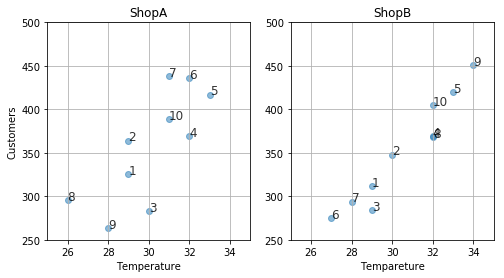

In [4]:
#２つのサブプロットを使って散布図を描く。
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.scatter(col2a, col3a, alpha=0.5)
plt.title("ShopA")
plt.xlabel("Temperature")
plt.ylabel("Customers")
plt.xlim([25, 35])
plt.ylim([250, 500])
for day, x, y in zip(col1a, col2a, col3a):
    plt.text(x, y, day, alpha=0.8, size=12)
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(col2b, col3b, alpha=0.5)
plt.title("ShopB")
plt.xlabel("Tempareture")
plt.xlim([25, 35])
plt.ylim([250, 500])
for day, x, y in zip(col1b, col2b, col3b):
    plt.text(x, y, day, alpha=0.8, size=12)
plt.grid()

plt.show()

<h4 style="padding: 0.25em 0.5em;color: #494949;background: transparent;border-left: solid 5px #7db4e6;">課題2.2</h4>

[店舗Aと店舗Bの８月の客数データ](https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/shopAandB.txt)のデータを用い、店Aにおける最高気温と来客数の間の相関係数、店Bにおける最高気温と来客数の間の相関係数をそれぞれ求めてください。

* 平均は、全体の合計を個数で割ったものです。

In [5]:
# 平均値を求める関数
def average(list):
    return np.sum(list)/len(list)

* 標準偏差は、データのばらつきを表したものです。具体的には、それぞれのデータの平均からの差の二乗をすべて合計したものを個数で割り（これが「分散」）、そのルート（平方根）をとったものです。

In [6]:
# 分散を求める関数
def variance(list):
    mu = average(list)
    diff = np.array(list) - mu
    return np.sum(np.square(diff))/len(list)

In [7]:
# 標準偏差を求める関数
def standard_deviation(list):
    return np.sqrt(variance(list))

* 平均からの差を、偏差と呼びます。Xの偏差とYの偏差を掛け合わせたものを偏差積と呼びます。偏差積の平均を共分散と呼びます。

In [8]:
# 共分散 = 偏差積の平均 （偏差値、ではありません。偏差積、です）
def covariance(list1, list2):
    mu1,mu2 = average(list1), average(list2)
    diff1, diff2 = np.array(list1) - mu1, np.array(list2) - mu2
    return np.sum(diff1 * diff2)/len(list1)

In [9]:
# 相関係数 = 共分散を list1, list2 の標準偏差で割ったもの
def correlation(list1, list2):
    return covariance(list1,list2)/(standard_deviation(list1)*standard_deviation(list2))

In [10]:
# 課題2.2を解いてください。
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/shopAandB.txt'
req.urlretrieve(url, 'icecreamco.txt')

('icecreamco.txt', <http.client.HTTPMessage at 0x1d1fc8e8940>)

In [11]:
col1a,col2a,col3a,col1b,col2b,col3b = [],[],[],[],[],[]
for i, line in enumerate(open('icecreamco.txt', encoding='utf-8')):
    if i == 0:
        continue
    tmp = line.split(' ')
    if tmp[3] == 'A\n':
        col1a.append(int(tmp[0]))
        col2a.append(int(tmp[1]))
        col3a.append(int(tmp[2]))
    else:
        col1b.append(int(tmp[0]))
        col2b.append(int(tmp[1]))
        col3b.append(int(tmp[2]))

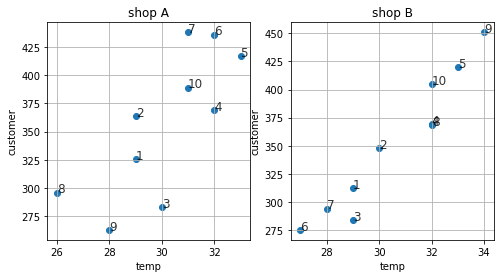

In [12]:
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.scatter(col2a, col3a)
plt.title('shop A')
plt.xlabel('temp')
plt.ylabel('customer')
for day, x, y in zip(col1a, col2a, col3a):
    plt.text(x, y, day, alpha=0.8, size=12)
plt.grid()
plt.subplot(1,2,2)
plt.scatter(col2b, col3b)
plt.title('shop B')
plt.xlabel('temp')
plt.ylabel('customer')
for day, x, y in zip(col1b, col2b, col3b):
    plt.text(x, y, day, alpha=0.8, size=12)
plt.grid()
plt.show()

In [13]:
import numpy as np
correlation(col2a,col3a), correlation(col2b, col3b)

(0.76002645836790872, 0.96353813884969519)

<h4 style="padding: 0.25em 0.5em;color: #494949;background: transparent;border-left: solid 5px #7db4e6;">課題2.5</h4>

[店舗別８月の平均客数データ（12店舗）](https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/shop_distance.txt)を用い、駅からの距離(m)と平均客数の間の相関係数を求めてください。

In [14]:
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/shop_distance.txt'
req.urlretrieve(url, 'icecreamdist.txt')

('icecreamdist.txt', <http.client.HTTPMessage at 0x1d1fc8e5e80>)

In [15]:
col1,col2,col3 = [],[],[]
for i, line in enumerate(open('icecreamdist.txt', encoding='utf-8')):
    if i == 0:
        continue
    tmp = line.split(' ')
    col1.append(int(tmp[0]))
    col2.append(int(tmp[1]))
    col3.append(int(tmp[2]))

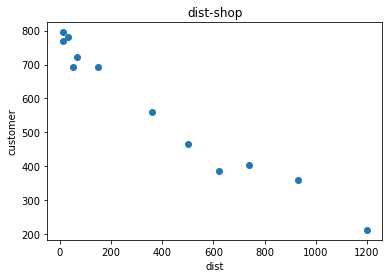

In [16]:
plt.scatter(col2,col3)
plt.title('dist-shop')
plt.xlabel('dist')
plt.ylabel('customer')
plt.show()

In [17]:
correlation(col2,col3)

-0.9795221182977909

<h4 style="border-bottom: solid 1px black;">相関の強さ</h4>
<p class="photo"><img src="image/aiko-hirameku.jpg" width="185" height="135"></p>
<P class="speech">───約マイナス0.98。最小で、マイナス1ですから、非常に強い負の相関ですね。三ヶ島先輩。</P>
<P class="speech">「そう、強い負の相関だね。相関係数をコトバで形容するときは、慣例で次のような言い回しが使われているよ」</P>
<P class="photo"><img src="image/senpai-setsumei.jpg" width="135" height="136"></P>
<table width="40%" border="1" align="center" cellpadding="0" cellspacing="0">
  <tr bgcolor="#FFFF66"> 
    <td width="43%"> 
      <div align="center">±0.7～±1</div></td>
    <td width="57%"> 
      <div align="center">強い相関がある</div></td>
  </tr>
  <tr bgcolor="#FFFF99"> 
    <td> 
      <div align="center">±0.4～±0.7</div></td>
    <td> 
      <div align="center">中程度の相関がある</div></td>
  </tr>
  <tr bgcolor="#FFFFCC"> 
    <td> 
      <div align="center">±0.2～±0.4</div></td>
    <td> 
      <div align="center">弱い相関がある</div></td>
  </tr>
  <tr bgcolor="#FFFFFF"> 
    <td> 
      <div align="center">±0～±0.2</div></td>
    <td> 
      <div align="center">ほとんど相関がない</div></td>
  </tr>
</table>



In [18]:
# アイスクリーム統計学 第２章 課題